In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/James Stone - athlete_events.csv')

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df.shape

(271116, 15)

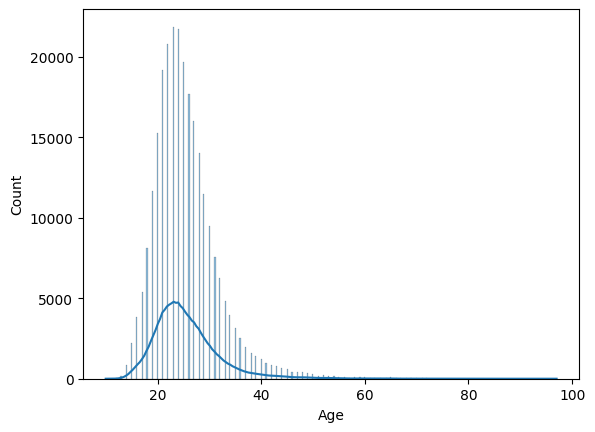

In [ ]:
data = df['Age']
sns.histplot(data, kde = True)
plt.show()

In [ ]:
df['win'] = df['Medal'].dropna()

In [ ]:
df.groupby('Team')['win'].value_counts().sort_values(ascending = False)

Team           win   
United States  Gold      2474
               Silver    1512
               Bronze    1233
Soviet Union   Gold      1058
               Silver     716
                         ... 
Togo           Bronze       1
Nrnberg        Gold         1
Femur-1        Gold         1
Fantlet-7      Gold         1
Clearwater     Bronze       1
Name: win, Length: 783, dtype: int64

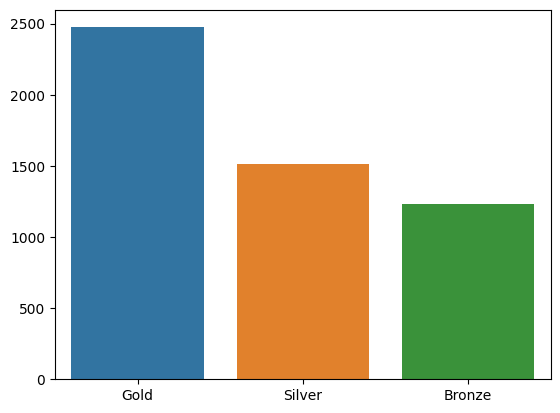

In [ ]:
categories = ['Gold', 'Silver', 'Bronze']
values = [2474, 1512, 1233]
sns.barplot(x = categories, y = values)
plt.show()

In [ ]:
df['Year'].max()

2016

In [ ]:
china_gold_medals = df[(df['NOC'] == 'CHN') & (df['Medal'] == 'Gold')]

In [ ]:
num_gold_medals = len(china_gold_medals)

In [ ]:
female_athletes = df[df['Sex'] == 'F']
female_athlete_counts = female_athletes['NOC'].value_counts()

In [ ]:
female_athlete_counts.head(4)

USA    5533
CAN    3563
GBR    3277
GER    2999
Name: NOC, dtype: int64

In [ ]:
data = pd.DataFrame({
    'category' : ['USA', 'CAN', 'GBR'] ,
    'value' : [5533, 3563, 3277]
})

alt.Chart(data).mark_circle().encode(
    x = 'category',
    y = 'value',
    color = 'category'
)

alt.Chart(...)

In [ ]:
filtered_data = df[(df['Sex'] == 'M') & (df['Medal'] == 'Gold') & (df['Event'] == "Football Men's Football")]

Text(0.5, 1.0, 'Trends in Age and Weight of Male Gold Medalists in Football')

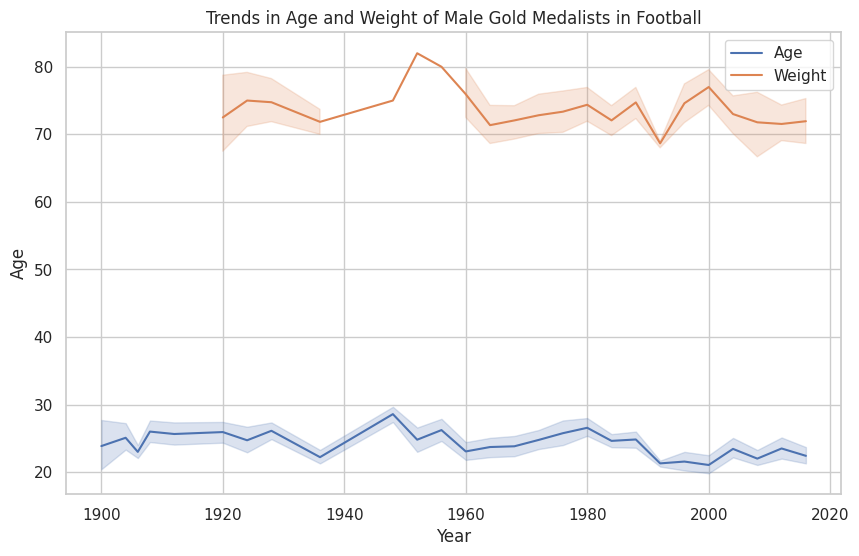

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='Year', y='Age', label='Age')
sns.lineplot(data=filtered_data, x='Year', y='Weight', label='Weight')
plt.title('Trends in Age and Weight of Male Gold Medalists in Football')

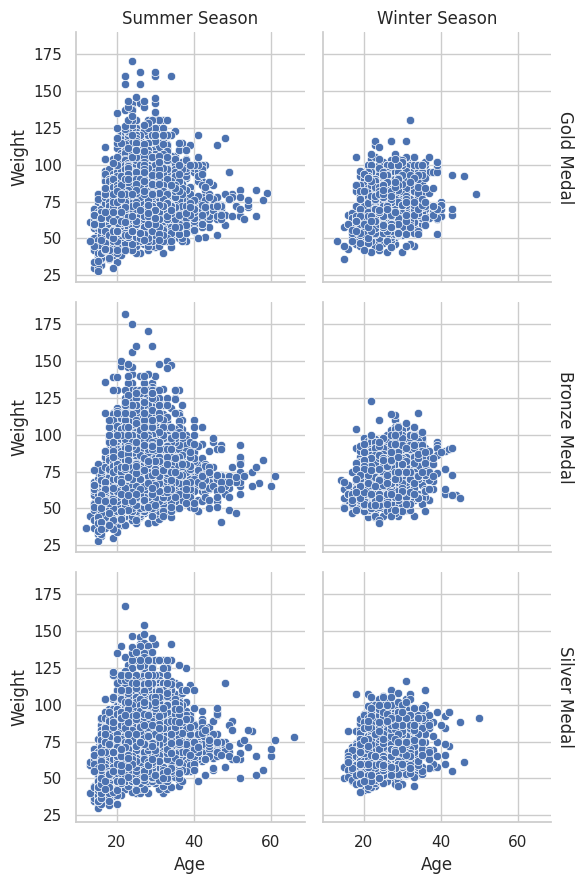

In [ ]:
g = sns.FacetGrid(df, col='Season', row='Medal', margin_titles=True)
g.map(sns.scatterplot, 'Age', 'Weight')
g.set_axis_labels("Age", "Weight")
g.set_titles(col_template="{col_name} Season", row_template="{row_name} Medal")
g.tight_layout()

In [ ]:
sample_size = 1000
sampled_df = df.sample(sample_size, random_state=42)

chart = alt.Chart(sampled_df).mark_circle().encode(
    x=alt.X('Age:Q', title='Age'),
    y=alt.Y('Weight:Q', title='Weight'),
    size=alt.Size('Height:Q', title='Height', scale=alt.Scale(range=[0, 500])),
    tooltip=['Age', 'Weight', 'Height']
).properties(
    width=200,
    height=200
).facet(
    column='Season:N',
    row='Medal:N'
).interactive()
chart

alt.FacetChart(...)

In [ ]:
female_athletes = df[df['Sex'] == 'F']

In [ ]:
female_athlete_count = female_athletes.groupby('Year')['ID'].count().reset_index()

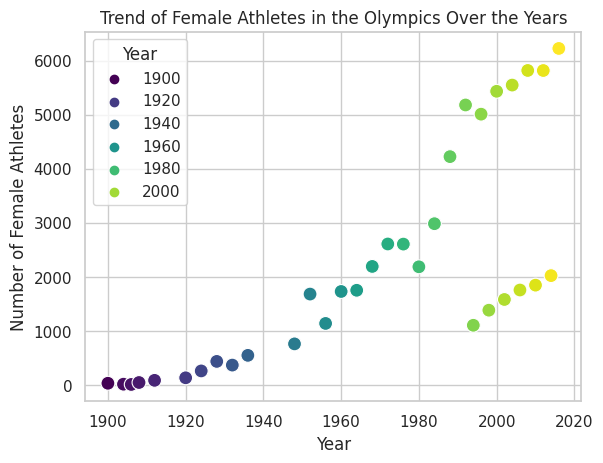

In [ ]:
sns.scatterplot(data=female_athlete_count, x='Year', y='ID', hue='Year', s=100, palette="viridis")
sns.set_style('whitegrid')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.title('Trend of Female Athletes in the Olympics Over the Years')
plt.show()

In [ ]:
male_athletes = df[df['Sex'] == 'M']

In [ ]:
average_age_by_year = male_athletes.groupby('Year')['Age'].mean().reset_index()

In [ ]:
data = average_age_by_year.rename(columns={'Year': 'value', 'Age': 'category'})

In [ ]:
points = alt.Chart(data).mark_circle().encode(
    x='value',
    y='category',
    color='category'
)

line = alt.Chart(data).mark_line(color='red').transform_regression(
    'value', 'category'
).encode(
    x='value',
    y=alt.Y('category', title='Average Age (Years)')
)

points + line

alt.LayerChart(...)

In [ ]:
events_per_year = df.groupby('Year')['Event'].nunique().reset_index()

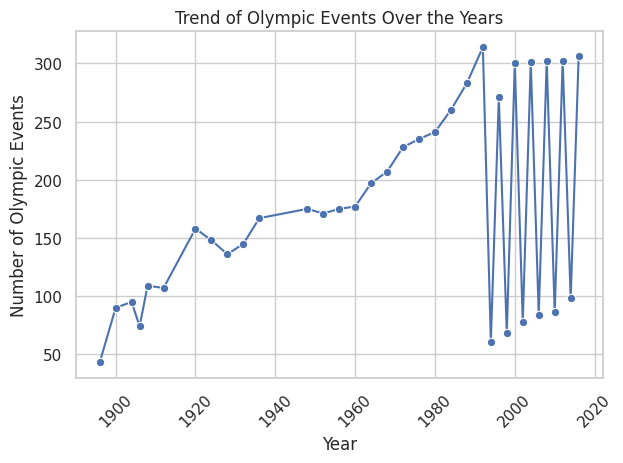

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(data=events_per_year, x='Year', y='Event', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Olympic Events')
plt.title('Trend of Olympic Events Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
country_of_interest = 'USA'

In [ ]:
country_df = df[df['NOC'] == country_of_interest]

In [ ]:
total_medals_by_year = country_df.groupby('Year')['Medal'].count().reset_index()

In [ ]:
data = total_medals_by_year.rename(columns={'Year': 'a', 'Medal': 'b'})
chart = alt.Chart(data).mark_line().encode(
    x=alt.X('a:O', title='Year'),
    y=alt.Y('b:Q', title='Total Number of Medals')
).properties(
    width=600,
    height=300
).configure_axisX(labelAngle=45)
chart

alt.Chart(...)